In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData

from rlmolecule.sql import Base, Session
from rlmolecule.sql.tables import GameStore, RewardStore, StateStore

%matplotlib inline

In [2]:
run_id = "gridworld_16"

dbname = "bde"
port = "5432"
host = "yuma.hpc.nrel.gov"
user = "rlops"
passwd_file = '/projects/rlmolecule/rlops_pass'
with open(passwd_file, 'r') as f:
    passwd = f.read().strip()
drivername = "postgresql+psycopg2"
engine_str = f'{drivername}://{user}:{passwd}@{host}:{port}/{dbname}'
        
engine = create_engine(engine_str, execution_options={"isolation_level": "AUTOCOMMIT"})

# load the games played
Session.configure(bind=engine)
session = Session()

In [3]:
df = pd.read_sql(session.query(GameStore).filter_by(run_id=run_id).statement, session.bind)

df['time_hours'] = (df.time - df.time.min()).apply(lambda x: x.total_seconds() / 3600)
df = df.sort_values('time_hours')
df_games = df
df_games.reset_index(drop=True, inplace=True)
df_games.head()

,id,run_id,time,raw_reward,scaled_reward,search_statistics,time_hours
0,ad1d196f-694e-448a-91d3-de21b1e17c4c,gridworld_16,2021-04-28 10:21:45.086107,-52.0,0.133333,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,0.000000e+00
1,6b4e85a8-a154-4b16-b966-c33ba4c5ec94,gridworld_16,2021-04-28 10:21:45.087271,-52.0,0.133333,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,3.233333e-07
2,5cf5cdd1-51d2-454d-8193-546b6f6ab2a6,gridworld_16,2021-04-28 10:21:45.087430,-53.0,0.116667,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,3.675000e-07
3,158e409f-158e-4edf-b5a8-46402c926abc,gridworld_16,2021-04-28 10:21:45.088328,-56.0,0.066667,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,6.169444e-07
4,2d233f07-9fd4-4011-af89-705f90c746f7,gridworld_16,2021-04-28 10:21:45.088757,-54.0,0.100000,[[5f020ff03dcbe5ede13f1b7d3165545320c40d890522...,7.361111e-07


<AxesSubplot:>

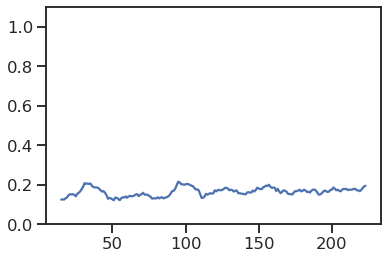

In [4]:
df["scaled_reward"].rolling(16).mean().plot(ylim=(0, 1.1))

In [12]:
df_games["search_statistics"].shape
game = df_games["search_statistics"][128]
game[0]

['5f020ff03dcbe5ede13f1b7d3165545320c40d8905222140f92e50a25f43d29d',
 [['af87f4e624e471198a93b051ed002210ba6eb2522cf4b104ec9405df65d53bdd',
   0.3225806451612903],
  ['32af5f68b9529d7e5a00fd06590039dc8e71def5ef93be1a331695380e535561',
   0.3225806451612903],
  ['5f020ff03dcbe5ede13f1b7d3165545320c40d8905222140f92e50a25f43d29d',
   0.3548387096774194]]]

In [14]:
for g in game:
    print(sum([x[1] for x in g[1]]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0


In [15]:
df2 = pd.read_sql(session.query(StateStore).filter_by(run_id=run_id, digest=game[0][0]).statement, session.bind)
df2

,digest,hash,run_id,state,policy_inputs
0,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-197667723924049093,gridworld_16,b'x\x9c\xed\x9bk\x93\xdb4\x14\x86\x9df[Z\xf7\x...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
1,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-197667723922966568,gridworld_16,b'x\x9c\xed\x9bk\x93\xdb4\x14\x86\x9df[Z\xf7\x...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
2,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-197667723921884043,gridworld_16,b'x\x9c\xed\x9bks\xdbD\x14\x86\xe5:\xbd\xa9\x9...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
3,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-197667723920801518,gridworld_16,b'x\x9c\xed\x9bk\x93\xdb4\x14\x86\x9df[Z\xf7\x...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
4,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,-197667723919718993,gridworld_16,b'x\x9c\xed\x9bk\x93\xdb4\x14\x86\x9df[Z\xf7\x...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
...,...,...,...,...,...
117,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,318639130148155370,gridworld_16,b'x\x9c\xed\x9bk\x93\xdb4\x14\x86\x9df[Z\xf7\x...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
118,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,318639130149237895,gridworld_16,b'x\x9c\xed\x9bks\xdbD\x14\x86\xe5:-\xadzIB\xb...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
119,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,318639130150320420,gridworld_16,b'x\x9c\xed\x9bk\x97\xd3D\x18\xc7S\xba \x84\xc...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...
120,5f020ff03dcbe5ede13f1b7d3165545320c40d89052221...,318639130151402945,gridworld_16,b'x\x9c\xed\x9bk\x97\xd3D\x18\xc7S\xba \x84\xc...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\...


In [6]:
# engine =  create_engine('sqlite:///hallway_data.db',
#                          connect_args={'check_same_thread': False},
#                          execution_options = {"isolation_level": "AUTOCOMMIT"})

# dbname = "bde"
# port = "5432"
# host = "yuma.hpc.nrel.gov"
# user = "rlops"
# passwd_file = '/projects/rlmolecule/rlops_pass'
# with open(passwd_file, 'r') as f:
#     passwd = f.read().strip()
# drivername = "postgresql+psycopg2"
# engine_str = f'{drivername}://{user}:{passwd}@{host}:{port}/{dbname}'
        
# engine = create_engine(engine_str, execution_options={"isolation_level": "AUTOCOMMIT"})

In [16]:
float(df["time"].values[-1] - df["time"].values[0])/1e9/60

5.405813266666667

# 5x5 gridworld 

In [38]:
# engine = create_engine(f'sqlite:///gridworld_data.db',
#                        connect_args={'check_same_thread': False},
#                        execution_options = {"isolation_level": "AUTOCOMMIT"})

# Scratch

In [3]:
from rlmolecule.tree_search.reward import LinearBoundedRewardFactory
from rlmolecule.gym.gym_state import GymEnvState
from gridworld_env import GridWorldEnv as GridEnv
from gridworld_env import make_empty_grid
from solve_gridworld import con


ImportError: cannot import name 'GridWorldProblem' from 'gridworld_env' (/lustre/eaglefs/projects/rlmolecule/dbiagion/rlmolecule/examples/gym/gridworld_env.py)

In [8]:
grid = make_empty_grid(16)
env = GridEnv(grid, use_scalar_obs=True)
_ = env.reset()

In [9]:
e = GymEnvState(env, 0, 0, 0, False)
e.hash()

5395833287013825878

In [13]:
n = e.get_next_actions()
list(set(n))

[(array([0]), 1), (array([1]), 1), (array([16]), 1)]

In [15]:
problem = GridWorldProblem(
    env=env,
    engine=engine,
)

NameError: name 'GridWorldProblem' is not defined